<h1 style="text-align:center">House Price Prediction Technique</h1>

# Step-1 Import Data

In [168]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

from matplotlib import pyplot as plt
import matplotlib.pyplot as plte
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
train = pd.read_csv("../content/drive/MyDrive/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../content/drive/MyDrive/input/house-prices-advanced-regression-techniques/test.csv")

In [171]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [172]:
train.shape

(1460, 81)

In [173]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [174]:
test.shape

(1459, 80)

##Step-2 Target Value: SalePrice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


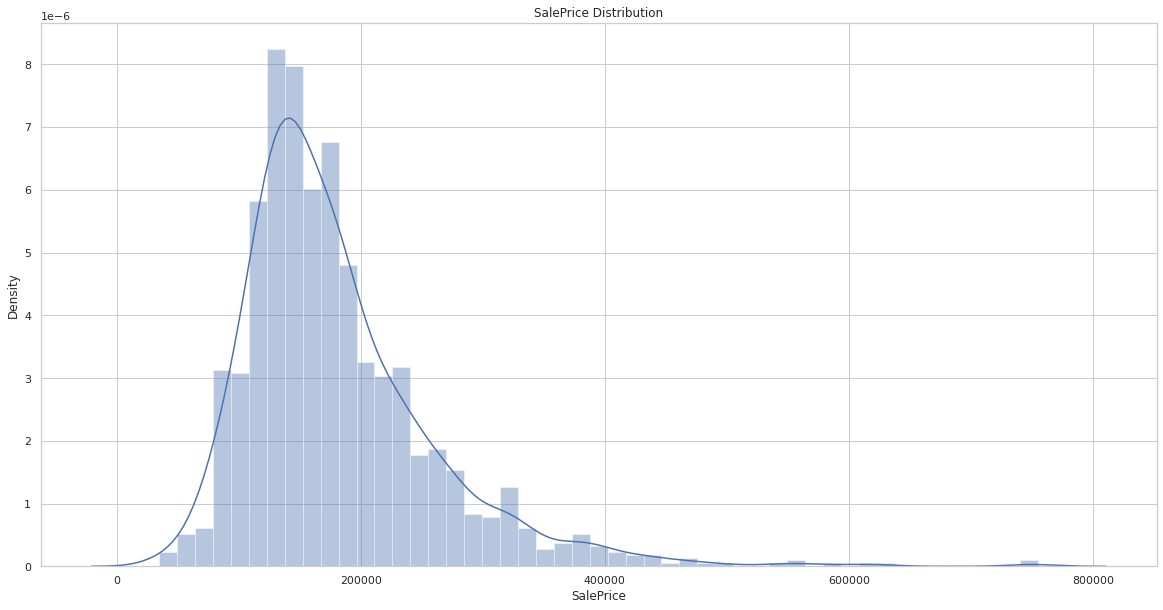

In [175]:
plt.figure(figsize=(20,10))
b = sns.distplot(train['SalePrice'])
b.set_title("SalePrice Distribution");

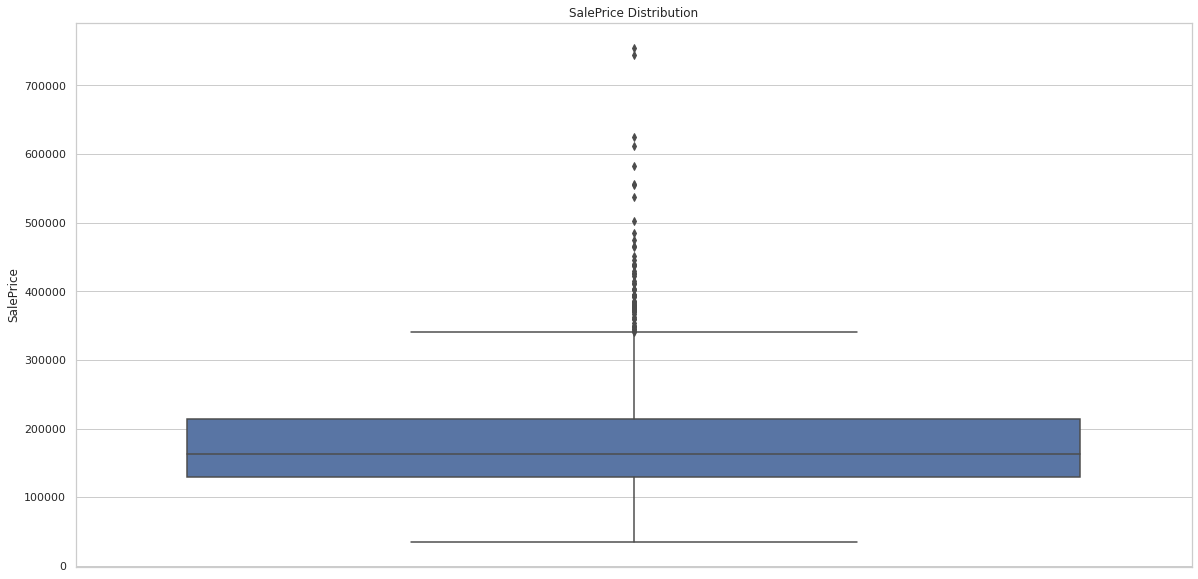

In [176]:
plt.figure(figsize=(20,10))
b = sns.boxplot(y = 'SalePrice', data = train)
b.set_title("SalePrice Distribution");

In [177]:
len(train[train['SalePrice'] > 700000])

2

We have two outliers where `SalePrice` is `> 700000`. Let's get rid of these.

In [178]:
train.shape

(1460, 81)

In [179]:
train = train[train['SalePrice'] <= 700000]

In [180]:
train.shape

(1458, 81)

#Step-3 Handling missing values

**Where do we have NaN values?**

In [181]:
train.columns[train.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [182]:
test.columns[test.isna().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

Let's look at which values have what percentage of missing data:

In [183]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1178,0.807956
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


Let's delete the columns that have more than 15% missing data:

In [184]:
train = train.drop(['PoolQC'], axis=1)
test = test.drop(['PoolQC'], axis=1)

train = train.drop(['MiscFeature'], axis=1)
test = test.drop(['MiscFeature'], axis=1)

train = train.drop(['Alley'], axis=1)
test = test.drop(['Alley'], axis=1)

train = train.drop(['Fence'], axis=1)
test = test.drop(['Fence'], axis=1)

train = train.drop(['FireplaceQu'], axis=1)
test = test.drop(['FireplaceQu'], axis=1)

train = train.drop(['LotFrontage'], axis=1)
test = test.drop(['LotFrontage'], axis=1)

Let's first fill all numeric values with the median.

In [185]:
train = train.fillna(train.median())
test = test.fillna(test.median())

Fill the other values with `None`.

In [186]:
test['MSZoning'] = test['MSZoning'].fillna('None')

In [187]:
train = train.drop(['Utilities'], axis=1)
test = test.drop(['Utilities'], axis=1)

In [188]:
test['Exterior1st'] = test['Exterior1st'].fillna('None')

train.loc[train['Exterior1st'].value_counts()[train['Exterior1st']].values < 18,'Exterior1st'] = 'Rare'
test.loc[test['Exterior1st'].value_counts()[test['Exterior1st']].values < 18,'Exterior1st'] = 'Rare'

In [189]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('None')

train.loc[train['Exterior2nd'].value_counts()[train['Exterior2nd']].values < 10,'Exterior2nd'] = 'Rare'
test.loc[test['Exterior2nd'].value_counts()[test['Exterior2nd']].values < 10,'Exterior2nd'] = 'Rare'

In [190]:
train['MasVnrType'] = train['MasVnrType'].fillna('Missing')
test['MasVnrType'] = test['MasVnrType'].fillna('Missing')

In [191]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')

In [192]:
train['BsmtCond'] = train['BsmtCond'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')

In [193]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')

In [194]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')

In [195]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [196]:
train['Electrical'] = train['Electrical'].fillna('None')
test['Electrical'] = test['Electrical'].fillna('None')

In [197]:
test['KitchenQual'] = test['KitchenQual'].fillna('None')

In [198]:
test['Functional'] = test['Functional'].fillna('None')

In [199]:
train['GarageType'] = train['GarageType'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')

In [200]:
train['GarageFinish'] = train['GarageFinish'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')

In [201]:
train['GarageQual'] = train['GarageQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')

In [202]:
train['GarageCond'] = train['GarageCond'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

In [203]:
train['SaleType'] = train['SaleType'].fillna('None')
test['SaleType'] = test['SaleType'].fillna('None')

Let's check if we have any NaN values left:

In [204]:
train.isna().all().sum()

0

In [205]:
test.isna().all().sum()

0

Nope, we don't have any left!

#Step-4 Feature Engineering

In [206]:
y_train = train['SalePrice'].values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)

In [207]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))


(37.5, -0.5)

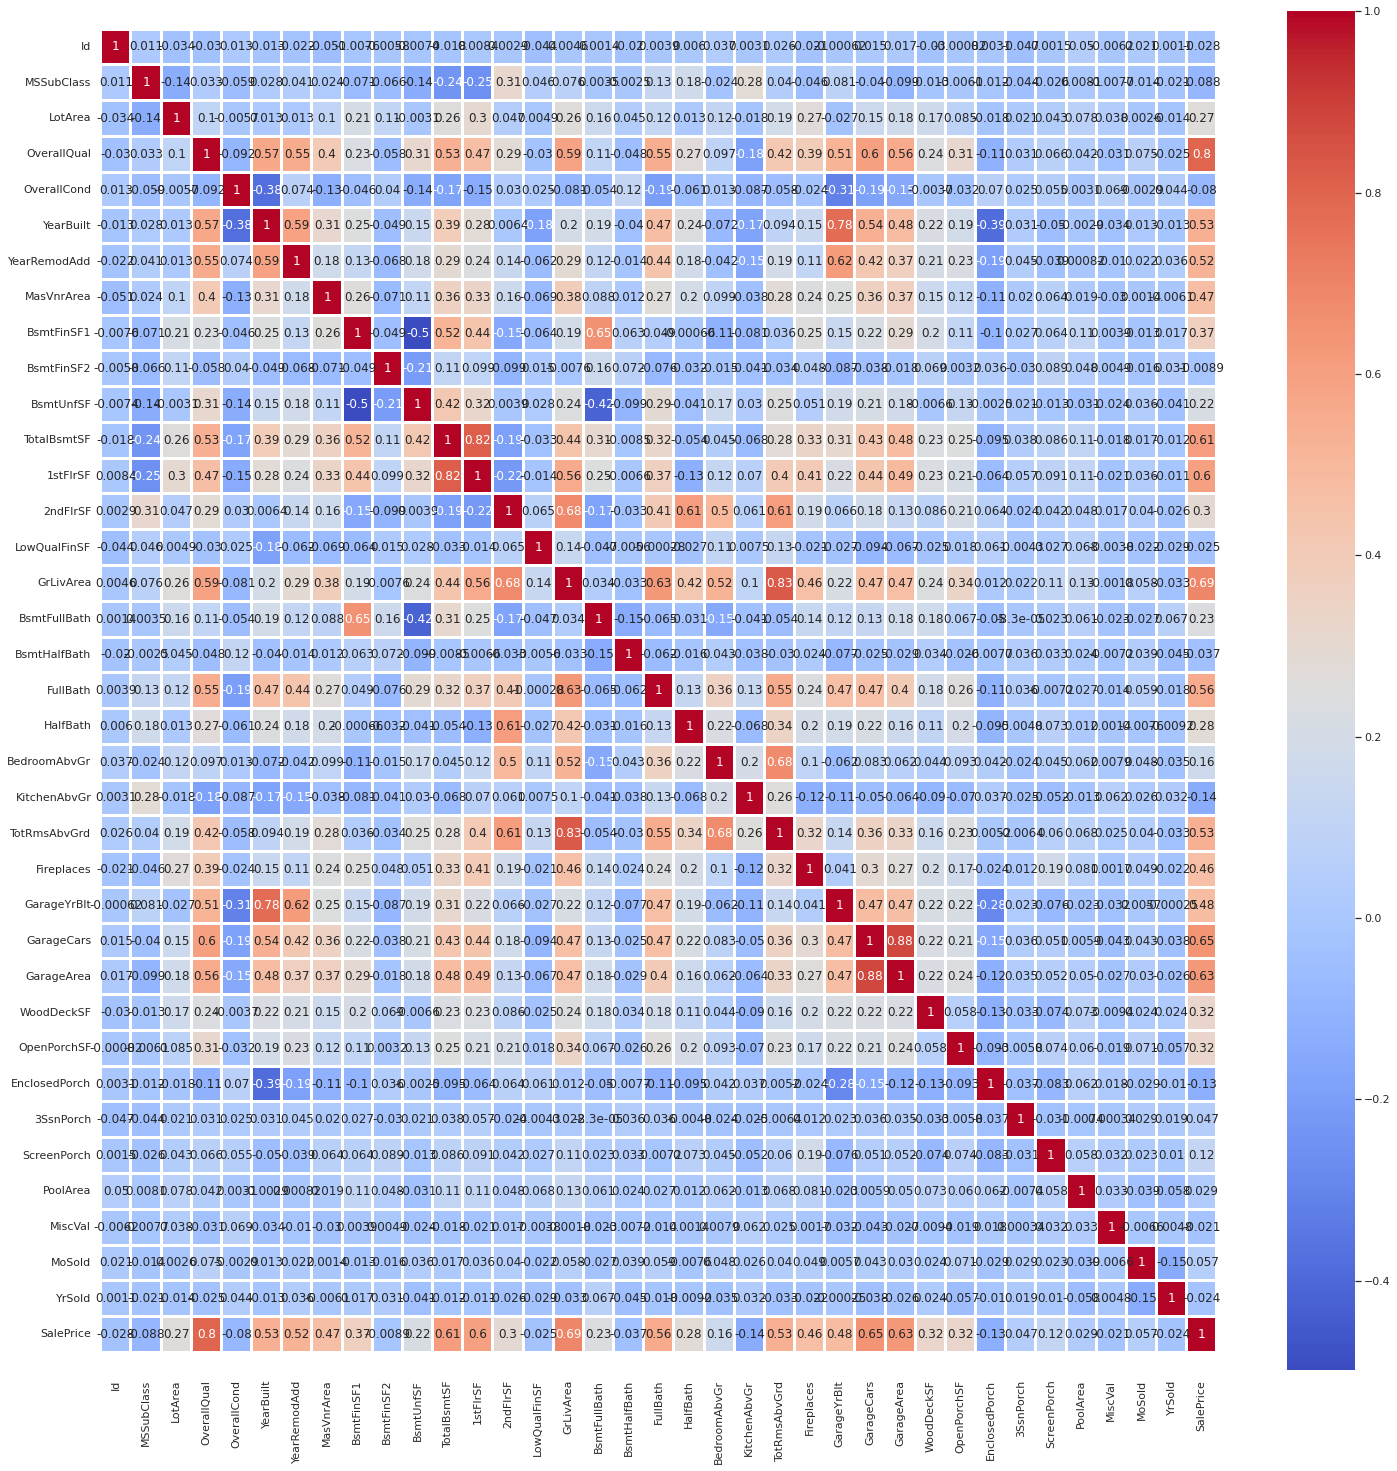

In [208]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [209]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 207)


#Step-5 Modeling

In [210]:
train = df[df['Id'] < 1461]
test = df[df['Id'] >= 1461]

In [211]:
X = train
y = y_train

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [213]:
# Put models in a dictionary
models = {"Lasso": Lasso(tol=0.1), 
          "RandomForestRegressor" : RandomForestRegressor(),
          "GradientBoostingRegressor" : GradientBoostingRegressor(),
          "XGBRegressor": XGBRegressor(),
          "LGBMRegressor": LGBMRegressor()
}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    return model_scores

In [214]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

[18:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'GradientBoostingRegressor': 41588.51771829362,
 'LGBMRegressor': 37746.3253020979,
 'Lasso': 57961.17772199597,
 'RandomForestRegressor': 39848.099106100766,
 'XGBRegressor': 40417.952166498784}

In [215]:
gbr = GradientBoostingRegressor(n_estimators=5000)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

41852.35147237198

#Step-6 Predicting values

In [216]:
y_pred = gbr.predict(test)
y_pred

array([127205.66614422, 168419.46346647, 188095.54820247, ...,
       148151.84360973, 119990.36652332, 222811.333091  ])